<a href="https://colab.research.google.com/github/Aimerlee123/Python-team-project/blob/main/%EA%B3%B5%ED%95%AD%EA%B2%BD%EB%A1%9C_%EC%A0%95%EB%B3%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/datasience/airports.dat',header=None,encoding='UTF-8')

In [ ]:
df3=pd.read_csv('/content/drive/MyDrive/datasience/routes.dat',header=None,encoding='UTF-8')

In [ ]:
df2n=df2[[0,6,7]]  #id,lat,long
df3n=df3[[3,5]]  #source 공항 destination 공항 
df2n.head(3).append(df2n.tail(3))

,0,6,7
0,1,-6.081690,145.391998
1,2,-5.207080,145.789001
2,3,-5.826790,144.296005
7695,14108,58.625000,31.385000
7696,14109,-27.261200,-70.779198
7697,14110,46.880001,35.305000


In [ ]:
df2n.dtypes,df2n.shape

(0      int64
 6    float64
 7    float64
 dtype: object, (7698, 3))

In [ ]:
df3n.head(10)

,3,5
0,2965,2990
1,2966,2990
2,2966,2962
3,2968,2990
4,2968,4078
5,4029,2990
6,4029,6969
7,4029,\N
8,4029,6160
9,6156,2952


In [ ]:
df3n.dtypes,df3n.shape

(3    object
 5    object
 dtype: object, (67663, 2))

In [ ]:
df2n.isna().sum().sum(),df3n.isna().sum().sum() #no missing values

(0, 0)

In [ ]:
df3n[3].values  #모든 정보가 stirng 형태인 것을 확인 

array(['2965', '2966', '2966', ..., '2912', '2912', '2913'], dtype=object)

In [ ]:
sum([i.isnumeric() for i in df3n[3].values]) #들어 있는 값중 정수로 숫자로 바뀔 수 있는 것 확인

67443

In [ ]:
df3n.shape #220개가 숫자 아닌 개 있는 것을 확인할 수 있다. 이것을 걸러내야 한다. 

(67663, 2)

In [ ]:
df2n=df2n.set_index(0) #공항 id를 index로 사용
df2n

,6,7
0,,
1,-6.081690,145.391998
2,-5.207080,145.789001
3,-5.826790,144.296005
4,-6.569803,146.725977
5,-9.443380,147.220001
...,...,...
14106,71.616699,52.478298
14107,51.849998,107.737999
14108,58.625000,31.385000


In [ ]:
from geopy.distance import great_circle,geodesic

In [ ]:
distances=[]

for i in range(df3n.shape[0]):
  src=df3n.iloc[i][3]
  dst=df3n.iloc[i][5]
  if (not src.isnumeric()) or (not dst.isnumeric()):  #숫자로 바뀌지 않는 경우 제외 
    continue


  src, dst= int(src),int(dst)

  if src in df2n.index and dst in df2n.index:
    src_lat, src_long= df2n.loc[src][6],df2n.loc[src][7]
    dst_lat, dst_long= df2n.loc[dst][6],df2n.loc[dst][7]
    dist=great_circle((src_lat,src_long),(dst_lat,dst_long)).km
    distances.append(dist)


In [ ]:
len(distances),sum(distances)/len(distances)

(66771, 1855.5559623902984)

Text(0, 0.5, 'Number of flights')

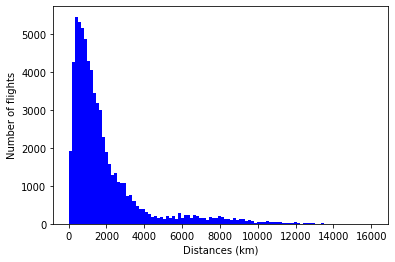

In [ ]:
plt.hist(distances,bins=100,facecolor='b')
plt.xlabel('Distances (km)')
plt.ylabel('Number of flights')

In [ ]:
df2n.iloc[0][6]

-6.081689834590001